In [1]:
# ! gsutil -m rsync -r gs://tesorai-data/nature_methods_submission/for_pride ../data/benchmark_results

In [ ]:
import pandas as pd

import upsetplot
from upsetplot import UpSet

import sys
import os

# silence warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
from tesorai_search import data_parsing_utils

/Users/mburq/miniconda3/envs/tesorai/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
_DATA_DIR = "../data/benchmark_results/"
# benchmark = "bassani_sternberg"
benchmark = "bekker_jensen"

benchmark_results = {
    "Tesorai": set(
        data_parsing_utils.get_tesorai_peptides(
            _DATA_DIR + f"{benchmark}/tesorai/pep_fdr.csv"
        )
    ),
    "MaxQuant": set(
        data_parsing_utils.get_maxquant_peptides(
            _DATA_DIR + f"{benchmark}/maxquant/msms.txt"
        )
    ),
    "FragPipe": set(
        data_parsing_utils.get_fragpipe_peptides(
            _DATA_DIR + f"{benchmark}/fragpipe/peptides.tsv"
        )
    ),
    "Peaks": set(
        data_parsing_utils.get_peaks_peptides(
            _DATA_DIR + f"{benchmark}/peaks/peptides.csv"
        )
    ),
    "Proteome Discoverer": set(
        data_parsing_utils.get_pd_peptides(
            _DATA_DIR + f"{benchmark}/proteome_discoverer/peptides.xlsx"
        )
    ),

}

Found 183147 peptides by TS
Found 169476 peptides by maxquant from 436857 unique rows
Found 173019 peptides by fragpipe from 173019 unique rows
Found 170604 peptides by PEAKS from 187147 unique rows
Found 190362 peptides by PD from 207171 unique rows


<Figure size 1000x600 with 0 Axes>

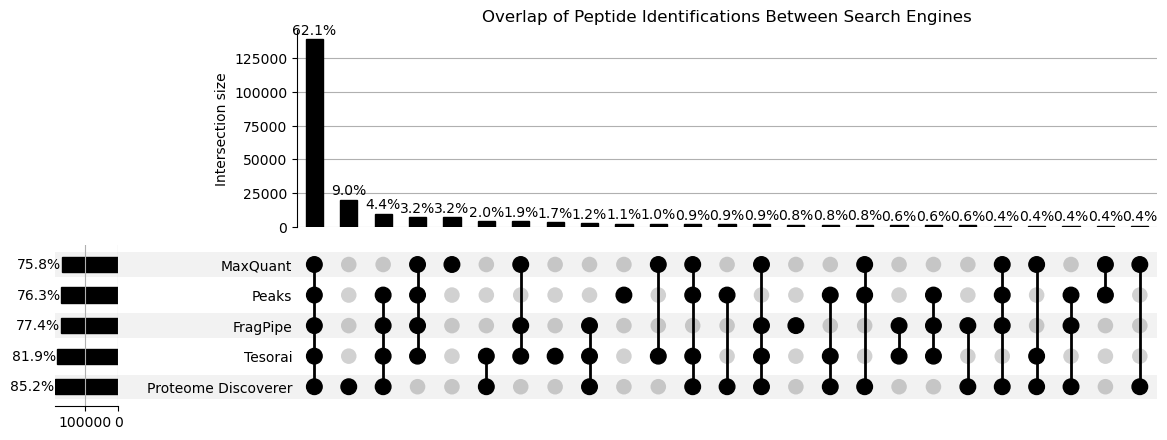

In [32]:
from_contents = upsetplot.from_contents(benchmark_results)

# Create and customize the plot
fig = plt.figure(figsize=(10, 6))
upset = UpSet(
    from_contents, sort_by="cardinality", show_percentages=True, 
    min_subset_size=300,
)
upset.plot()
plt.title("Overlap of Peptide Identifications Between Search Engines")
plt.show()

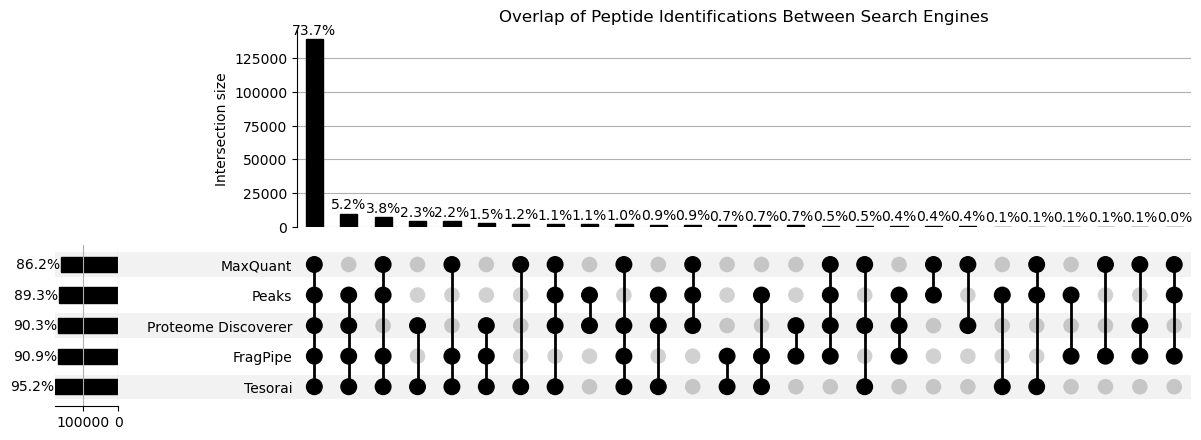

In [31]:
benchmark_results_robust = {}

for search_engine, peptides in benchmark_results.items():
    union_others = set()
    for other_engine, other_peptides in benchmark_results.items():
        if other_engine != search_engine:
            union_others.update(other_peptides)
    # Intersect with the union of all other search engines' peptides
    benchmark_results_robust[search_engine] = peptides.intersection(union_others)

from_contents = upsetplot.from_contents(benchmark_results_robust)

# Create upset plot after removing all entries that are unique to only one search engine
upset = UpSet(
    from_contents,
    sort_by="cardinality",
    show_percentages=True,
    # min_subset_size=300,
)
upset.plot()
plt.title("Overlap of Peptide Identifications Between Search Engines")
plt.show()